In [1]:
import hepi
import smpl
import numpy as np
import hepi.madgraph as mg
import matplotlib.pyplot as plt
import hepi.resummino as rs
import time
from smpl import plot
print (mg.get_path())
rs.set_path("~/git/resummino_ug_to_UX_vNLO/")
print (rs.get_path())

/opt/MG5_aMC_v2_7_0/
~/git/resummino_ug_to_UX_vNLO/


3455.9592650009095
Running: 147 jobs
[4.002251e-08+/-3.2842209e-11 3.7351523e-08+/-3.0650414e-11
 3.4601457e-08+/-2.8466513e-11 3.2292255e-08+/-2.6566739e-11
 3.0276268e-08+/-2.4908194e-11 2.8175508e-08+/-2.3234736e-11
 2.6416527e-08+/-2.1784205e-11 2.5059869e-08+/-2.0690091e-11
 2.3396915e-08+/-1.9317112e-11 2.1562173e-08+/-1.7847173e-11
 2.0131323e-08+/-1.6662848e-11 1.8881059e-08+/-1.5627995e-11
 1.7487372e-08+/-1.4508012e-11 1.6401311e-08+/-1.3606985e-11
 1.5774053e-08+/-1.3093637e-11 1.4732878e-08+/-1.2229384e-11
 1.3508307e-08+/-1.1240827e-11 1.2616684e-08+/-1.049887e-11
 1.1836921e-08+/-9.8499969e-12 1.0911704e-08+/-9.1010498e-12
 1.0237315e-08+/-8.5385674e-12 9.9692735e-09+/-8.3130013e-12
 9.3145322e-09+/-7.7670372e-12 8.4972619e-09+/-7.102039e-12
 7.9391963e-09+/-6.6356059e-12 7.4507544e-09+/-6.2273646e-12
 6.8364768e-09+/-5.7260667e-12 6.4158773e-09+/-5.3737828e-12
 6.3188683e-09+/-5.2927319e-12 5.9058183e-09+/-4.9467581e-12
 5.3607499e-09+/-4.5003575e-12 5.0103299e-09+/-4.20

ValueError: Array must not contain infs or nans.

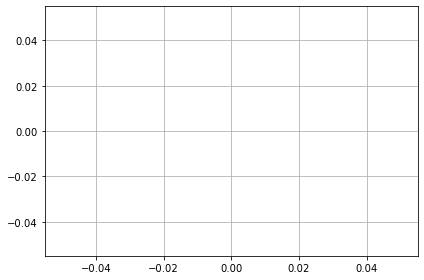

In [4]:
for run_plot in [False ]:
    for scenario in ["scenarioB_mod.in","scenarioA.in"]:
        for lo_pdf,nlo_pdf in [("CT18NLO","CT18NLO")]:
            for p in [2000002, 1000002]:
                li = [hepi.Input(hepi.Order.LO, 13000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.1,id="_")]

                li = hepi.scan_invariant_mass(li, 4000, 20+1,low=2000)
                print(li[0].invariant_mass)
                li = hepi.seven_point_scan(li)

                dl = rs.run(li, True, False)
                print(dl["lo"])
                if not run_plot:
                    dl = hepi.scale_error(li,dl)
                    print(dl["lo_scale"])
                    plot.data([],[],init=True)
                    hepi.plot(dl, "invariant_mass", "lo_scale", logy=False, label="lo",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plot.show()
                    #hepi.plot(dl, "invariant_mass", "nlo", logy=False, label="nlo",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    plot.show()
                    #hepi.plot(dl, "invariant_mass", "nlo_plus_nll", logy=False, label="nlo+nll",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plot.show()
                    #plt.savefig(input.get_output_dir() + "inv_mass_" + str(p) + "_" + str(nlo_pdf) + "_" +str(scenario) + ".pdf")
                                                                                                                                                            

2862.3316600000003
Running: 15 jobs


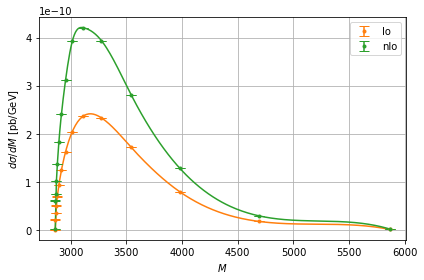

AttributeError: 'function' object has no attribute 'get_output_dir'

In [5]:
for run_plot in [False ]:
    for scenario in ["scenarioB.in"]:
        for lo_pdf,nlo_pdf in [("CT18NLO","CT18NLO")]:
            for p in [1000021]:
                li = [hepi.Input(hepi.Order.NLO, 13000, p, 1000022, scenario, lo_pdf, nlo_pdf, 1., 1.,precision=0.1)]

                li = hepi.scan_invariant_mass(li, 3000, 15)
                print(li[0].invariant_mass)
                #li = hepi.seven_point_scan(li)

                dl = rs.run(li, False, True)

                if not run_plot:
                    
                    plot.data([],[],init=True)
                    hepi.plot(dl, "invariant_mass", "lo", logy=False, label="lo",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plot.show()
                    hepi.plot(dl, "invariant_mass", "nlo", logy=False, label="nlo",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    plot.show()
                    #hepi.plot(dl, "invariant_mass", "nlo_plus_nll", logy=False, label="nlo+nll",xaxis="$M$",yaxis="$d\\sigma/dM$ [pb/GeV]")
                    #plot.show()
                    #plt.savefig(input.get_output_dir() + "inv_mass_" + str(p) + "_" + str(nlo_pdf) + "_" +str(scenario) + ".pdf")
                                                                                                                                                            